# Blurring

<function matplotlib.pyplot.show>

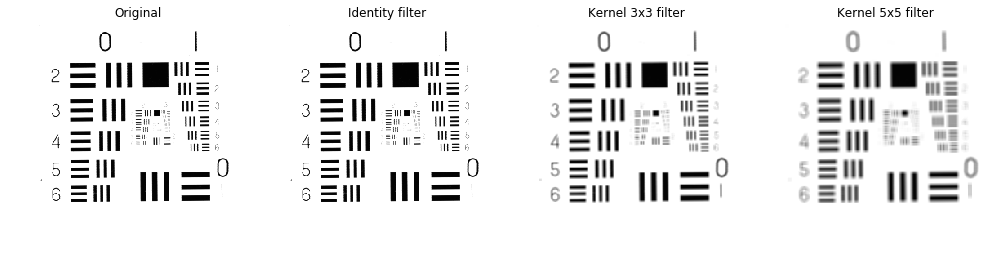

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread('./images/blurring.tiff'), cv2.COLOR_BGR2RGB) 
rows, cols = img.shape[:2]

kernel_identity = np.array([[0,0,0],[0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0 # normalization
kernel_5x5 = np.ones((5,5), np.float32) / 25.0

idf = cv2.filter2D(img, -1, kernel_identity)
k_3 = cv2.filter2D(img, -1, kernel_3x3)
k_5 = cv2.filter2D(img, -1, kernel_5x5)

plt.figure(figsize=(14,4))
plt.subplot(141), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(idf), plt.title('Identity filter'), plt.axis('off')
plt.subplot(143), plt.imshow(k_3), plt.title('Kernel 3x3 filter'), plt.axis('off')
plt.subplot(144), plt.imshow(k_5), plt.title('Kernel 5x5 filter'), plt.axis('off')
plt.tight_layout()
plt.show

# Edge detection

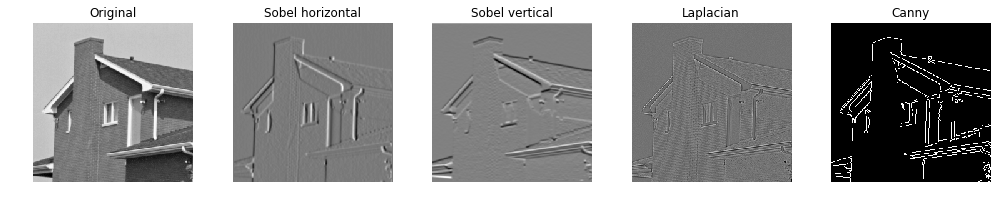

In [2]:
import cv2
import numpy as np

img = cv2.imread('./images/house2.tiff')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rows, cols = img.shape[:2]

sobel_horizontal = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
canny = cv2.Canny(gray, 50, 240) # two numbers as the thresholds.

plt.figure(figsize=(14,4))
plt.subplot(151); plt.imshow(gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(152); plt.imshow(sobel_horizontal, cmap='gray'); plt.title('Sobel horizontal'); plt.axis('off')
plt.subplot(153); plt.imshow(sobel_vertical, cmap='gray'); plt.title('Sobel vertical'); plt.axis('off')
plt.subplot(154); plt.imshow(laplacian, cmap='gray'); plt.title('Laplacian'); plt.axis('off')
plt.subplot(155); plt.imshow(canny, cmap='gray'); plt.title('Canny'); plt.axis('off')
plt.tight_layout()
plt.show()


# Sharpening

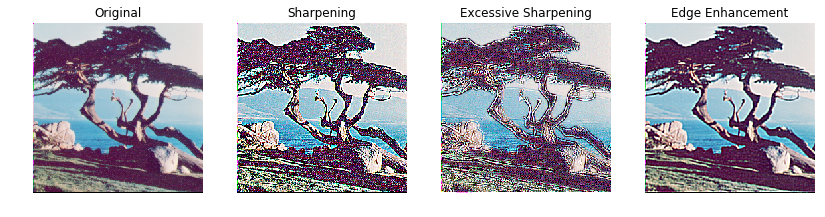

In [4]:
import cv2
import numpy as np

img = cv2.cvtColor(cv2.imread('./images/tree.tiff'), cv2.COLOR_BGR2RGB)


# generating the kernels
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
 [-1,2,2,2,-1],
 [-1,2,8,2,-1],
 [-1,2,2,2,-1],
 [-1,-1,-1,-1,-1]]) / 8.0

# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)

plt.figure(figsize=(14,4))
plt.subplot(141); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(142); plt.imshow(output_1); plt.title('Sharpening'); plt.axis('off')
plt.subplot(143); plt.imshow(output_2); plt.title('Excessive Sharpening'); plt.axis('off')
plt.subplot(144); plt.imshow(output_3); plt.title('Edge Enhancement'); plt.axis('off')
plt.show()

# Erosion and dilation

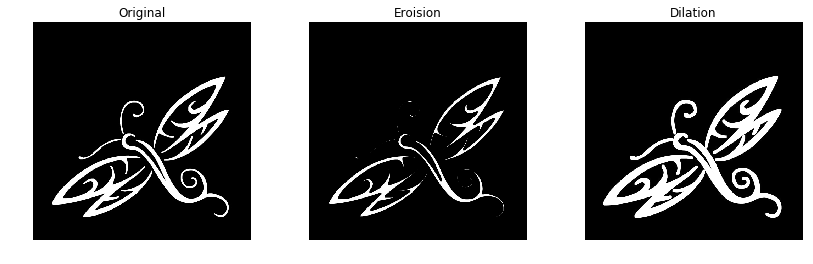

In [17]:
import cv2
import numpy as np

img = cv2.cvtColor(cv2.imread('./images/butterfly.jpg'), cv2.COLOR_BGR2GRAY)

kernel = np.ones((5,5), np.uint8)

img_eroision = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(14,4))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(132); plt.imshow(img_eroision, cmap='gray'); plt.title('Eroision'); plt.axis('off')
plt.subplot(133); plt.imshow(img_dilation, cmap='gray'); plt.title('Dilation'); plt.axis('off')
plt.show()

# Creating a vignette filter

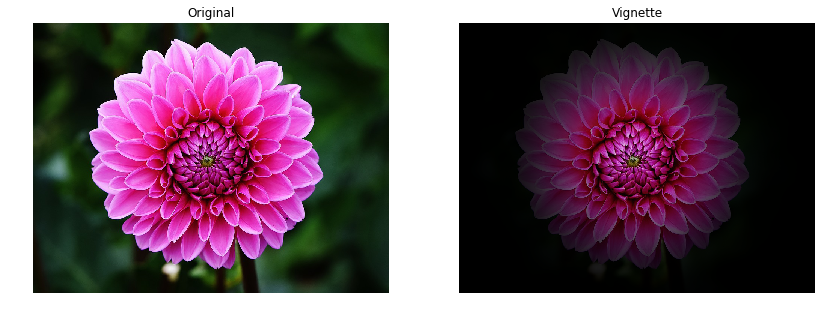

In [27]:
import cv2
import numpy as np

img = cv2.cvtColor(cv2.imread('./images/dahlia.jpg'), cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols, 150) # second parameter = standard deviation of the Gaussian
kernel_y = cv2.getGaussianKernel(rows, 150)
kernel = kernel_y * kernel_x.T # building 2D kernel whose size matches the size of the image.

mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(img)

# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

plt.figure(figsize=(14,7))
plt.subplot(121); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(output); plt.title('Vignette'); plt.axis('off')
plt.show()

# Enhancing the contrast in an image

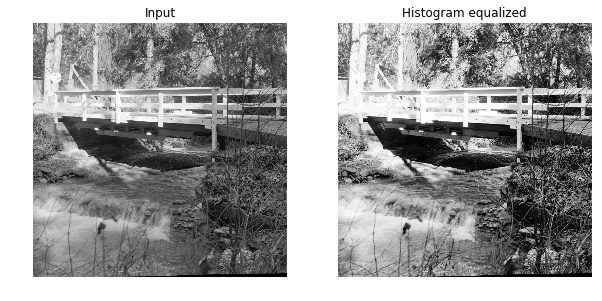

In [45]:
import cv2
import numpy as np

img = cv2.imread('./images/bridge.tiff', 0)

# equalize the histogram of the input image
histeq = cv2.equalizeHist(img)

plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Input'); plt.axis('off')
plt.subplot(122); plt.imshow(histeq, cmap='gray'); plt.title('Histogram equalized'); plt.axis('off')
plt.show()

# How do we handle color images?

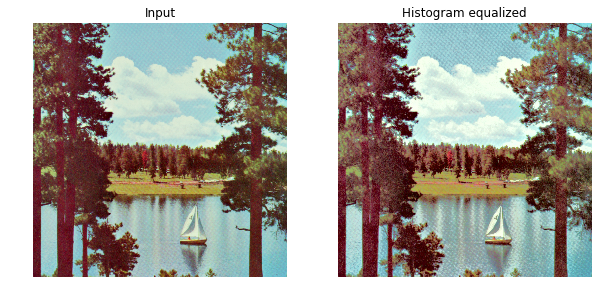

In [48]:
import cv2
import numpy as np

img = cv2.imread('./images/lake.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(img_rgb); plt.title('Input'); plt.axis('off')
plt.subplot(122); plt.imshow(img_output); plt.title('Histogram equalized'); plt.axis('off')
plt.show()